<a href="https://colab.research.google.com/github/davidguzmanr/CSC2516/blob/main/figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For plots in LaTeX
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install texlive-latex-extra
# ! sudo apt-get install texlive-full
! sudo apt-get install dvipng texlive-fonts-recommended cm-super

# ! pip install tensorboard

In [2]:
import zipfile
import urllib.request
import os

In [3]:
url = "https://csc2516-neural-networks-and-deep-learning.s3.amazonaws.com/cifar10/lightning_logs.zip"
filename = "lightning_logs.zip"

urllib.request.urlretrieve(url, filename)

with zipfile.ZipFile('lightning_logs.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
url = "https://csc2516-neural-networks-and-deep-learning.s3.amazonaws.com/text-classifier/lightning_logs.zip"
filename = "lightning_logs.zip"

urllib.request.urlretrieve(url, filename)

with zipfile.ZipFile('lightning_logs.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [123]:
! mkdir images/

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# %cd /content/drive/MyDrive

In [7]:
# %load_ext tensorboard

In [8]:
# %tensorboard --logdir ./ --port=6006

In [9]:
import tensorboard as tb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# sns.set_style('darkgrid')
# sns.reset_orig()

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

In [10]:
def get_results(path: str, log: str):
    val_acc = {}
    for exp in os.listdir(path):
      print(exp)
      event_acc = EventAccumulator(path + exp)
      event_acc.Reload()
      tags_val = event_acc.Scalars(log)
      steps = [x.step for x in tags_val]
      values = [x.value for x in tags_val]
      val_acc[exp] = values
    val_acc = pd.DataFrame(val_acc) 
    val_acc.index = steps #val_acc['step']
    return val_acc

# BERT

In [11]:
val_bert_no_reg = get_results('lightning_logs/bert-adam-no-regularization/', 'val_acc_epoch')
val_bert_with_reg = get_results('lightning_logs/bert-adam-with-regularization/', 'val_acc_epoch').add_suffix('_regularization')

bert_data_augmentation
epsilon_5_data_augmentation
epsilon_10
epsilon_5
epsilon_10_data_augmentation
epsilon_3_data_augmentation
bert
epsilon_3
bert_data_augmentation
epsilon_5_data_augmentation
epsilon_10
epsilon_5
epsilon_10_data_augmentation
epsilon_3_data_augmentation
bert
epsilon_3


In [12]:
# val_bert_no_reg.plot(), val_bert_with_reg.plot()

In [13]:
bert_private_no = pd.concat([val_bert_no_reg.filter(regex='bert'), val_bert_with_reg.filter(regex='bert')], axis =1)
bert_private_3 = pd.concat([val_bert_no_reg.filter(regex='epsilon_3'), val_bert_with_reg.filter(regex='epsilon_3')], axis =1)
bert_private_5 = pd.concat([val_bert_no_reg.filter(regex='epsilon_5'), val_bert_with_reg.filter(regex='epsilon_5')], axis =1)
bert_private_10 = pd.concat([val_bert_no_reg.filter(regex='epsilon_10'), val_bert_with_reg.filter(regex='epsilon_10')], axis =1)

In [159]:
def plot_accuracy_bert(data, ylim=None, loc='lower right', name=None):
    # data_to_plot = data.reset_index().melt(id_vars = [data.index.name]) # creo que falta "steps" aqui

    data.index = range(1, data.shape[0] + 1) # para pasar de steps -> epochs
    data.index.name = 'step'
    data_to_plot = data.reset_index().melt(id_vars = [data.index.name])
    data_to_plot[r'\textbf{Augmentation}'] = data_to_plot['variable'].str.contains('augmentation')
    data_to_plot[r'\textbf{Regularization}'] = data_to_plot['variable'].str.contains('regularization')

    plt.figure(figsize=(10,6))
  
    sns.lineplot(
        data = data_to_plot, 
        x='step', 
        y='value',
        hue=r'\textbf{Augmentation}', 
        style=r'\textbf{Regularization}'
    )
    plt.xlabel(r"\textbf{Epochs}", fontsize=20)
    plt.ylabel(r"\textbf{Accuracy}", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc=loc, fontsize=18)
    plt.xticks([1,2,3])
    
    if ylim:
        plt.ylim(ylim)

    if name:
        plt.savefig(name, bbox_inches='tight')

    plt.show()

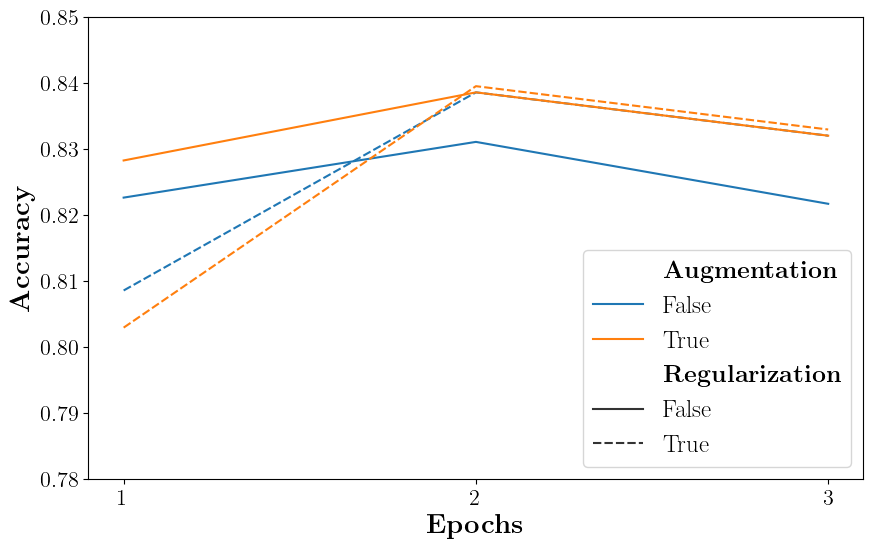

In [164]:
plot_accuracy_bert(bert_private_no, name='images/bert_private_no.pdf', ylim=(0.78, 0.85), loc='lower right')

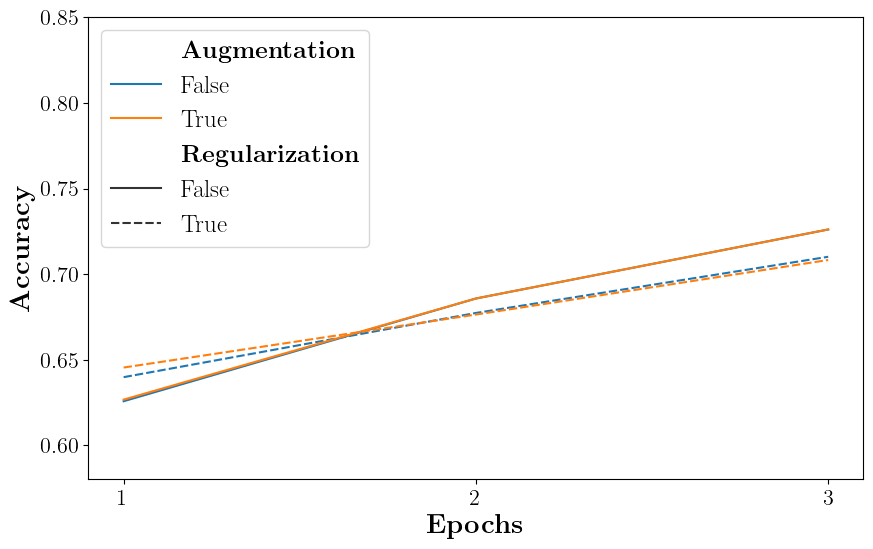

In [165]:
plot_accuracy_bert(bert_private_3, name='images/bert_private_3.pdf', ylim=(0.58, 0.85), loc='upper left')

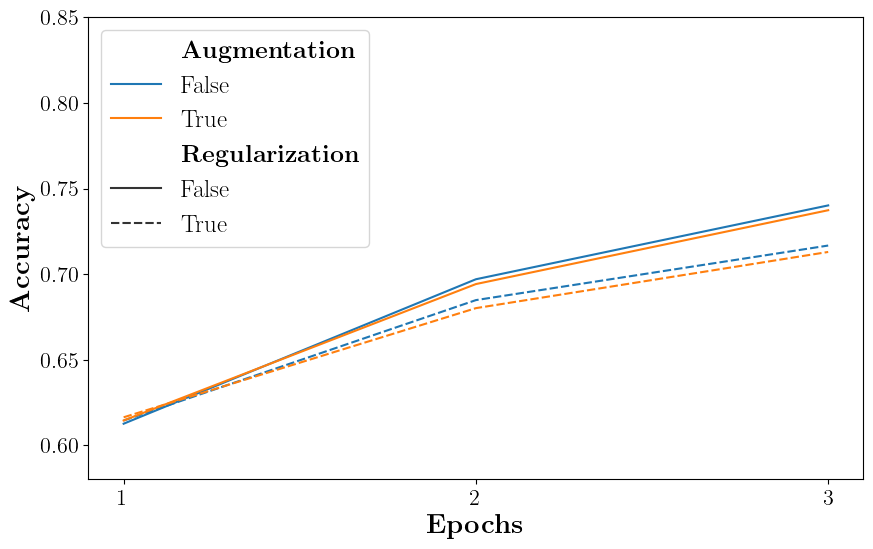

In [166]:
plot_accuracy_bert(bert_private_5, name='images/bert_private_5.pdf', ylim=(0.58, 0.85), loc='upper left')

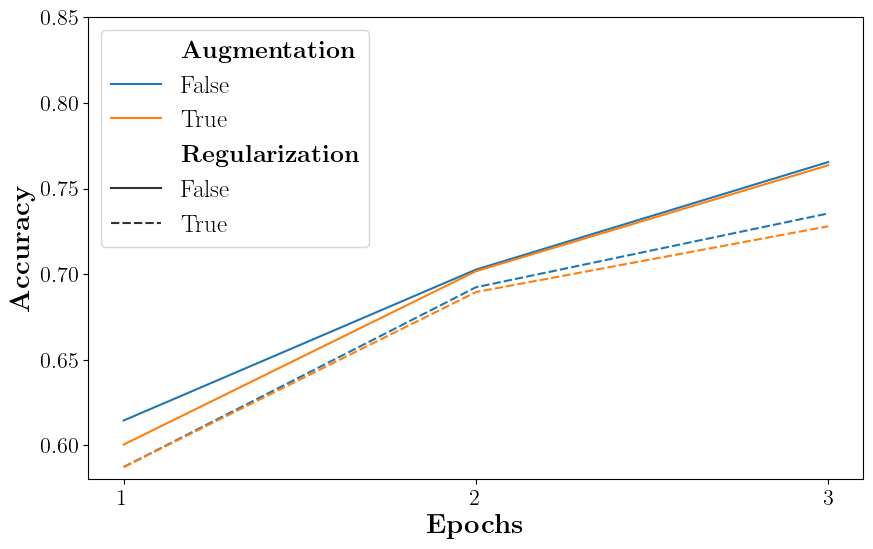

In [167]:
plot_accuracy_bert(bert_private_10, name='images/bert_private_10.pdf', ylim=(0.58, 0.85), loc='upper left')

# ResNet

In [168]:
val_resnet_no_reg = get_results('lightning_logs/resnet-sgd-no-regularization/', 'val_acc_epoch')
val_resnet_with_reg = get_results('lightning_logs/resnet-sgd-with-regularization/', 'val_acc_epoch').add_suffix('_regularization')

resnet
epsilon_30
epsilon_10
epsilon_50
resnet_data_augmentation
epsilon_50_data_augmentation
epsilon_10_data_augmentation
epsilon_30_data_augmentation
resnet
epsilon_30
epsilon_10
epsilon_50
resnet_data_augmentation
epsilon_50_data_augmentation
epsilon_10_data_augmentation
epsilon_30_data_augmentation


In [169]:
resnet_private_no = pd.concat([val_resnet_no_reg.filter(regex='resnet'), val_resnet_with_reg.filter(regex='resnet')], axis =1)
resnet_private_10 = pd.concat([val_resnet_no_reg.filter(regex='epsilon_10'), val_resnet_with_reg.filter(regex='epsilon_10')], axis =1)
resnet_private_30 = pd.concat([val_resnet_no_reg.filter(regex='epsilon_30'), val_resnet_with_reg.filter(regex='epsilon_30')], axis =1)
resnet_private_50 = pd.concat([val_resnet_no_reg.filter(regex='epsilon_50'), val_resnet_with_reg.filter(regex='epsilon_50')], axis =1)

In [170]:
def plot_accuracy_resnet(data, ylim=None, loc='lower right', name=None):
    # data_to_plot = data.reset_index().melt(id_vars = [data.index.name]) # creo que falta "steps" aqui

    data.index = range(1, data.shape[0] + 1) # para pasar de steps -> epochs
    data.index.name = 'step'
    data_to_plot = data.reset_index().melt(id_vars = [data.index.name])
    data_to_plot[r'\textbf{Augmentation}'] = data_to_plot['variable'].str.contains('augmentation')
    data_to_plot[r'\textbf{Regularization}'] = data_to_plot['variable'].str.contains('regularization')

    plt.figure(figsize=(10,6))
  
    sns.lineplot(
        data = data_to_plot, 
        x='step', 
        y='value',
        hue=r'\textbf{Augmentation}', 
        style=r'\textbf{Regularization}'
    )
    plt.xlabel(r"\textbf{Epochs}", fontsize=20)
    plt.ylabel(r"\textbf{Accuracy}", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc=loc, fontsize=18)
    
    if ylim:
        plt.ylim(ylim)

    if name:
        plt.savefig(name, bbox_inches='tight')

    plt.show()

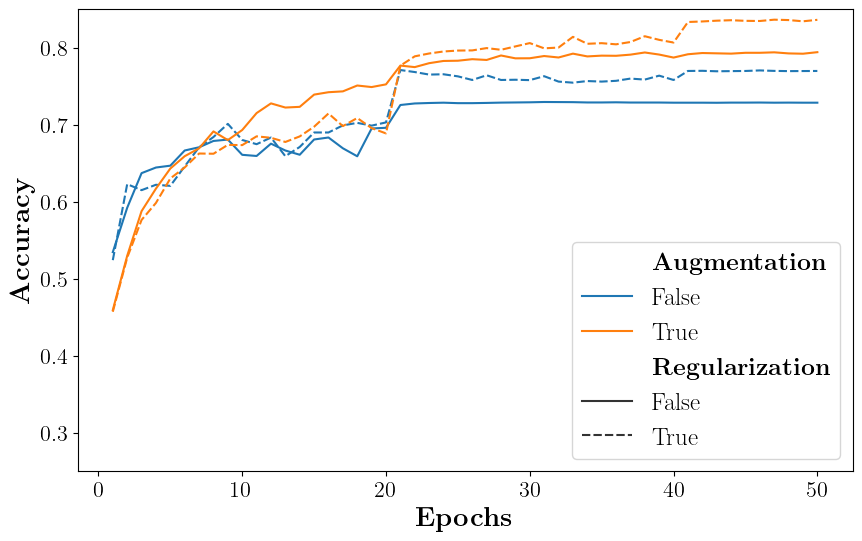

In [171]:
plot_accuracy_resnet(resnet_private_no, name='images/resnet_private_no.pdf', ylim=(0.25, 0.85), loc='lower right')

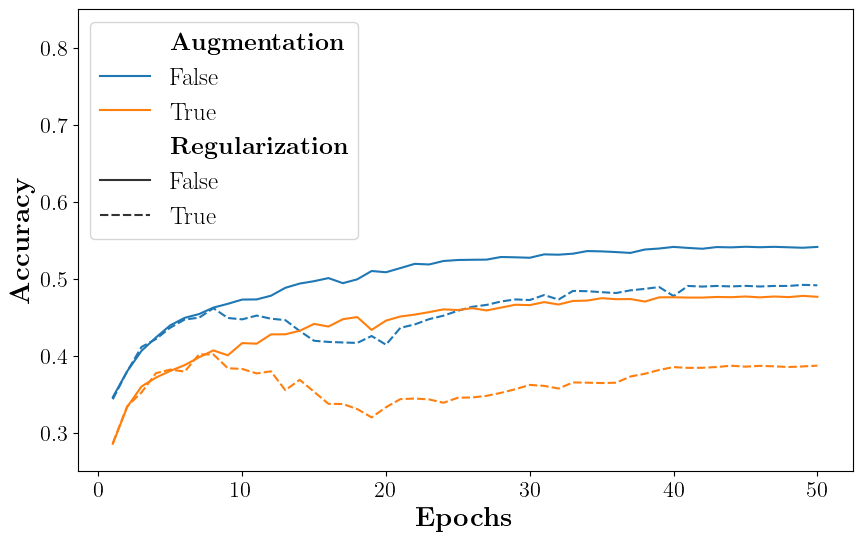

In [172]:
plot_accuracy_resnet(resnet_private_10, name='images/resnet_private_10.pdf', ylim=(0.25, 0.85), loc='upper left')

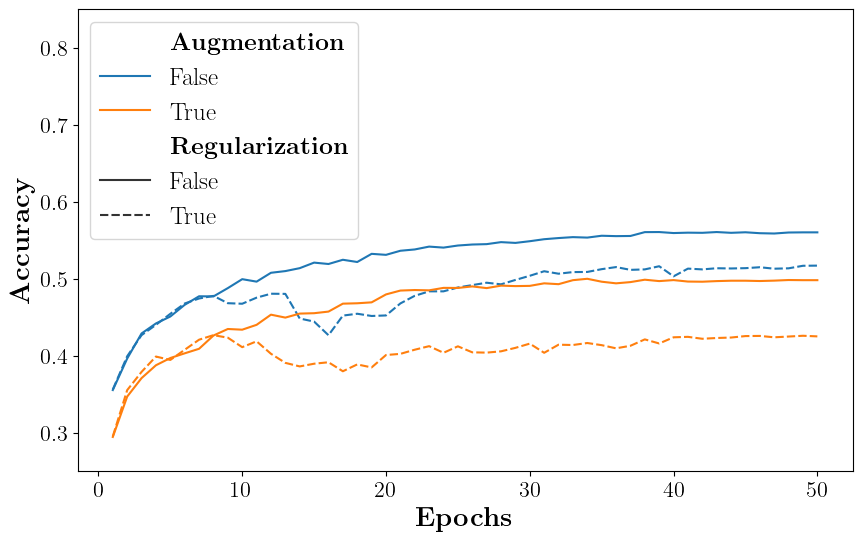

In [173]:
plot_accuracy_resnet(resnet_private_30, name='images/resnet_private_30.pdf', ylim=(0.25, 0.85), loc='upper left')

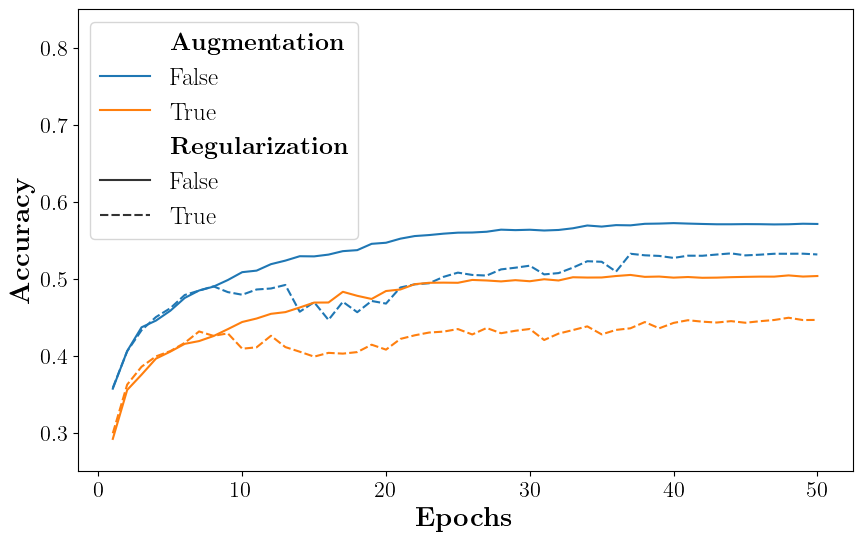

In [174]:
plot_accuracy_resnet(resnet_private_50, name='images/resnet_private_50.pdf', ylim=(0.25, 0.85), loc='upper left')

In [175]:
! zip -r images.zip images/

updating: images/ (stored 0%)
updating: images/bert_private_10.pdf (deflated 2%)
updating: images/resnet_private_30.pdf (deflated 2%)
updating: images/resnet_private_50.pdf (deflated 2%)
updating: images/bert_private_5.pdf (deflated 2%)
updating: images/bert_private_3.pdf (deflated 2%)
updating: images/resnet_private_no.pdf (deflated 2%)
updating: images/resnet_private_10.pdf (deflated 2%)
updating: images/bert_private_no.pdf (deflated 2%)
